### Transfer Learning

**torchvision - models:**
https://pytorch.org/docs/stable/torchvision/models.html

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

In [3]:
from torchvision import datasets, transforms, models

# import the pretrained models - here densenet121
model1 = models.densenet121(pretrained=True)
model1

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

A pretrained model has two components:

    1. Features
    2. Classifier

features are already trained weights- > think of it as feature detectors that apply to any images with similar features. When using transfer learning, make use of the pretrained feature detector and modify the classified and train it for your problem

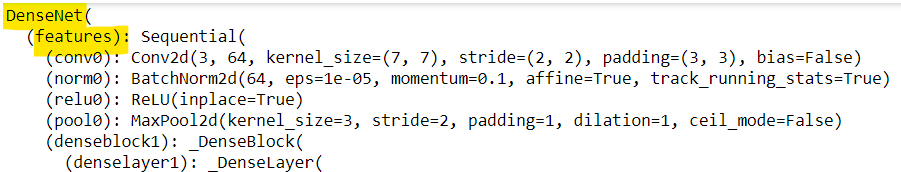

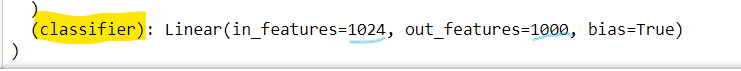

In [18]:
#for param in model1.parameters():

param = next(iter( model1.parameters()))
print(param.shape)
#param

torch.Size([64, 3, 7, 7])


### Freeze parameters 

before trining make sure we dont alter the parameters of the model (weights, biases, conv of features) by turning off autograd on them

In [22]:

# Freeze the params to prevent backpropagation 
for param in model1.parameters():
    param.requires_grad = False
    
# create our classifier
from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([('fc1', nn.Linear(1024, 500)),
                                        ('relu', nn.ReLU()),
                                        ('fc2', nn.Linear(500, 2)),
                                        ('output', nn.LogSoftmax(dim=1))]))

# update the new classifier to the pre-trained model
model1.classifier = classifier
model1.classifier

Sequential(
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=2, bias=True)
  (output): LogSoftmax()
)